In [1]:
!pip install xgboost

DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\aiofiles-23.2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\anyio-3.7.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\boto3-1.26.105-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anac

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import hashlib
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('FraudTrain.csv')

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

## No Missing values  and duplicated data present in the Dataset

## Data Imputation

In [9]:
df['trans_date_trans_time']=(df['trans_date_trans_time']).astype(str)

In [10]:
df['trans_date_trans_time'].str.strip('-')

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1296670    2020-06-21 12:12:08
1296671    2020-06-21 12:12:19
1296672    2020-06-21 12:12:32
1296673    2020-06-21 12:13:36
1296674    2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [11]:
df['tran_date']=df['trans_date_trans_time'].str[:10]

In [12]:
df['tran_time']=df['trans_date_trans_time'].str[10:]

In [13]:
df.drop(columns=['trans_date_trans_time'],inplace=True)

In [14]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,tran_date,tran_time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [15]:
df['tran_yr']=(df['tran_date'].str[:4]).astype(int)
df['tran_m']=(df['tran_date'].str[5:7]).astype(int)
df['tran_day']=(df['tran_date'].str[8:]).astype(int)

In [16]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,tran_date,tran_time,tran_yr,tran_m,tran_day
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,2019,1,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,2019,1,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,2019,1,1
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,2019,1,1
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,2019,1,1


In [17]:
df['tran_hr']=(df['tran_time'].str[2]).astype(int)


In [18]:
df['tran_min']=(df['tran_time'].str[4:5]).astype(int)

In [19]:
df['tran_sec']=(df['tran_time'].str[7:]).astype(int)

In [20]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,tran_date,tran_time,tran_yr,tran_m,tran_day,tran_hr,tran_min,tran_sec
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,2019-01-01,00:00:18,2019,1,1,0,0,18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,2019-01-01,00:00:44,2019,1,1,0,0,44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,2019-01-01,00:00:51,2019,1,1,0,0,51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,2019-01-01,00:01:16,2019,1,1,0,0,16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,2019-01-01,00:03:06,2019,1,1,0,0,6


In [21]:
df.drop(columns=['tran_time','tran_date'],inplace=True)

In [22]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,tran_yr,tran_m,tran_day,tran_hr,tran_min,tran_sec
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,0,16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,0,6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   merchant    1296675 non-null  object 
 3   category    1296675 non-null  object 
 4   amt         1296675 non-null  float64
 5   first       1296675 non-null  object 
 6   last        1296675 non-null  object 
 7   gender      1296675 non-null  object 
 8   street      1296675 non-null  object 
 9   city        1296675 non-null  object 
 10  state       1296675 non-null  object 
 11  zip         1296675 non-null  int64  
 12  lat         1296675 non-null  float64
 13  long        1296675 non-null  float64
 14  city_pop    1296675 non-null  int64  
 15  job         1296675 non-null  object 
 16  dob         1296675 non-null  object 
 17  trans_num   1296675 non-null  object 
 18  unix_time   1296675 no

In [24]:
df['gender']

0          F
1          F
2          M
3          M
4          M
          ..
1296670    M
1296671    M
1296672    M
1296673    M
1296674    M
Name: gender, Length: 1296675, dtype: object

In [25]:
gen_map={'M':0,'F':1}
df['gender']=df['gender'].map(gen_map)

In [26]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,tran_yr,tran_m,tran_day,tran_hr,tran_min,tran_sec
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,0,16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,0,6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   merchant    1296675 non-null  object 
 3   category    1296675 non-null  object 
 4   amt         1296675 non-null  float64
 5   first       1296675 non-null  object 
 6   last        1296675 non-null  object 
 7   gender      1296675 non-null  int64  
 8   street      1296675 non-null  object 
 9   city        1296675 non-null  object 
 10  state       1296675 non-null  object 
 11  zip         1296675 non-null  int64  
 12  lat         1296675 non-null  float64
 13  long        1296675 non-null  float64
 14  city_pop    1296675 non-null  int64  
 15  job         1296675 non-null  object 
 16  dob         1296675 non-null  object 
 17  trans_num   1296675 non-null  object 
 18  unix_time   1296675 no

In [28]:
df.drop(columns=['merchant','first','last','street','city'],inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   gender      1296675 non-null  int64  
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  dob         1296675 non-null  object 
 12  trans_num   1296675 non-null  object 
 13  unix_time   1296675 non-null  int64  
 14  merch_lat   1296675 non-null  float64
 15  merch_long  1296675 non-null  float64
 16  is_fraud    1296675 non-null  int64  
 17  tran_yr     1296675 non-null  int32  
 18  tran_m      1296675 no

In [30]:
df['state']

0          NC
1          WA
2          ID
3          MT
4          VA
           ..
1296670    UT
1296671    MD
1296672    NM
1296673    SD
1296674    MT
Name: state, Length: 1296675, dtype: object

In [31]:
one_hot_encoded = pd.get_dummies(df['state'], prefix='state')
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(columns=['state'],inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 73 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   gender      1296675 non-null  int64  
 5   zip         1296675 non-null  int64  
 6   lat         1296675 non-null  float64
 7   long        1296675 non-null  float64
 8   city_pop    1296675 non-null  int64  
 9   job         1296675 non-null  object 
 10  dob         1296675 non-null  object 
 11  trans_num   1296675 non-null  object 
 12  unix_time   1296675 non-null  int64  
 13  merch_lat   1296675 non-null  float64
 14  merch_long  1296675 non-null  float64
 15  is_fraud    1296675 non-null  int64  
 16  tran_yr     1296675 non-null  int32  
 17  tran_m      1296675 non-null  int32  
 18  tran_day    1296675 no

In [33]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [34]:
df['category_label_encoded'] = (df['category'].astype('category').cat.codes).astype(int)
df.drop(columns=['category'],inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 73 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1296675 non-null  int64  
 1   cc_num                  1296675 non-null  int64  
 2   amt                     1296675 non-null  float64
 3   gender                  1296675 non-null  int64  
 4   zip                     1296675 non-null  int64  
 5   lat                     1296675 non-null  float64
 6   long                    1296675 non-null  float64
 7   city_pop                1296675 non-null  int64  
 8   job                     1296675 non-null  object 
 9   dob                     1296675 non-null  object 
 10  trans_num               1296675 non-null  object 
 11  unix_time               1296675 non-null  int64  
 12  merch_lat               1296675 non-null  float64
 13  merch_long              1296675 non-null  float64
 14  is

In [36]:
df.drop(columns=['job'],inplace=True)

In [37]:
df['dob']

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1296670    1961-11-24
1296671    1979-12-11
1296672    1967-08-30
1296673    1980-08-18
1296674    1995-08-16
Name: dob, Length: 1296675, dtype: object

In [38]:
df['dob'] = pd.to_datetime(df['dob'])
df['int_dob'] = df['dob'].astype('int64') // 10**9
df.drop(columns=['dob'],inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 72 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1296675 non-null  int64  
 1   cc_num                  1296675 non-null  int64  
 2   amt                     1296675 non-null  float64
 3   gender                  1296675 non-null  int64  
 4   zip                     1296675 non-null  int64  
 5   lat                     1296675 non-null  float64
 6   long                    1296675 non-null  float64
 7   city_pop                1296675 non-null  int64  
 8   trans_num               1296675 non-null  object 
 9   unix_time               1296675 non-null  int64  
 10  merch_lat               1296675 non-null  float64
 11  merch_long              1296675 non-null  float64
 12  is_fraud                1296675 non-null  int64  
 13  tran_yr                 1296675 non-null  int32  
 14  tr

In [40]:
df['trans_num']

0          0b242abb623afc578575680df30655b9
1          1f76529f8574734946361c461b024d99
2          a1a22d70485983eac12b5b88dad1cf95
3          6b849c168bdad6f867558c3793159a81
4          a41d7549acf90789359a9aa5346dcb46
                         ...               
1296670    440b587732da4dc1a6395aba5fb41669
1296671    278000d2e0d2277d1de2f890067dcc0a
1296672    483f52fe67fabef353d552c1e662974c
1296673    d667cdcbadaaed3da3f4020e83591c83
1296674    8f7c8e4ab7f25875d753b422917c98c9
Name: trans_num, Length: 1296675, dtype: object

In [41]:
def hash_transaction(transaction):
    hashed = hashlib.sha256(transaction.encode()).hexdigest()
    return hashed


df['hashed_trans_num'] = df['trans_num'].apply(hash_transaction)



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 73 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1296675 non-null  int64  
 1   cc_num                  1296675 non-null  int64  
 2   amt                     1296675 non-null  float64
 3   gender                  1296675 non-null  int64  
 4   zip                     1296675 non-null  int64  
 5   lat                     1296675 non-null  float64
 6   long                    1296675 non-null  float64
 7   city_pop                1296675 non-null  int64  
 8   trans_num               1296675 non-null  object 
 9   unix_time               1296675 non-null  int64  
 10  merch_lat               1296675 non-null  float64
 11  merch_long              1296675 non-null  float64
 12  is_fraud                1296675 non-null  int64  
 13  tran_yr                 1296675 non-null  int32  
 14  tr

In [43]:
vectorizer = CountVectorizer(analyzer='char')
X = vectorizer.fit_transform(df['trans_num'])


df_tokenized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


df = pd.concat([df, df_tokenized], axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 89 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1296675 non-null  int64  
 1   cc_num                  1296675 non-null  int64  
 2   amt                     1296675 non-null  float64
 3   gender                  1296675 non-null  int64  
 4   zip                     1296675 non-null  int64  
 5   lat                     1296675 non-null  float64
 6   long                    1296675 non-null  float64
 7   city_pop                1296675 non-null  int64  
 8   trans_num               1296675 non-null  object 
 9   unix_time               1296675 non-null  int64  
 10  merch_lat               1296675 non-null  float64
 11  merch_long              1296675 non-null  float64
 12  is_fraud                1296675 non-null  int64  
 13  tran_yr                 1296675 non-null  int32  
 14  tr

In [45]:
df.drop(columns=['trans_num','hashed_trans_num'],inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 87 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1296675 non-null  int64  
 1   cc_num                  1296675 non-null  int64  
 2   amt                     1296675 non-null  float64
 3   gender                  1296675 non-null  int64  
 4   zip                     1296675 non-null  int64  
 5   lat                     1296675 non-null  float64
 6   long                    1296675 non-null  float64
 7   city_pop                1296675 non-null  int64  
 8   unix_time               1296675 non-null  int64  
 9   merch_lat               1296675 non-null  float64
 10  merch_long              1296675 non-null  float64
 11  is_fraud                1296675 non-null  int64  
 12  tran_yr                 1296675 non-null  int32  
 13  tran_m                  1296675 non-null  int32  
 14  tr

In [47]:
bool_columns = df.select_dtypes(include=bool)
bool_columns_int = bool_columns.astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 87 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1296675 non-null  int64  
 1   cc_num                  1296675 non-null  int64  
 2   amt                     1296675 non-null  float64
 3   gender                  1296675 non-null  int64  
 4   zip                     1296675 non-null  int64  
 5   lat                     1296675 non-null  float64
 6   long                    1296675 non-null  float64
 7   city_pop                1296675 non-null  int64  
 8   unix_time               1296675 non-null  int64  
 9   merch_lat               1296675 non-null  float64
 10  merch_long              1296675 non-null  float64
 11  is_fraud                1296675 non-null  int64  
 12  tran_yr                 1296675 non-null  int32  
 13  tran_m                  1296675 non-null  int32  
 14  tr

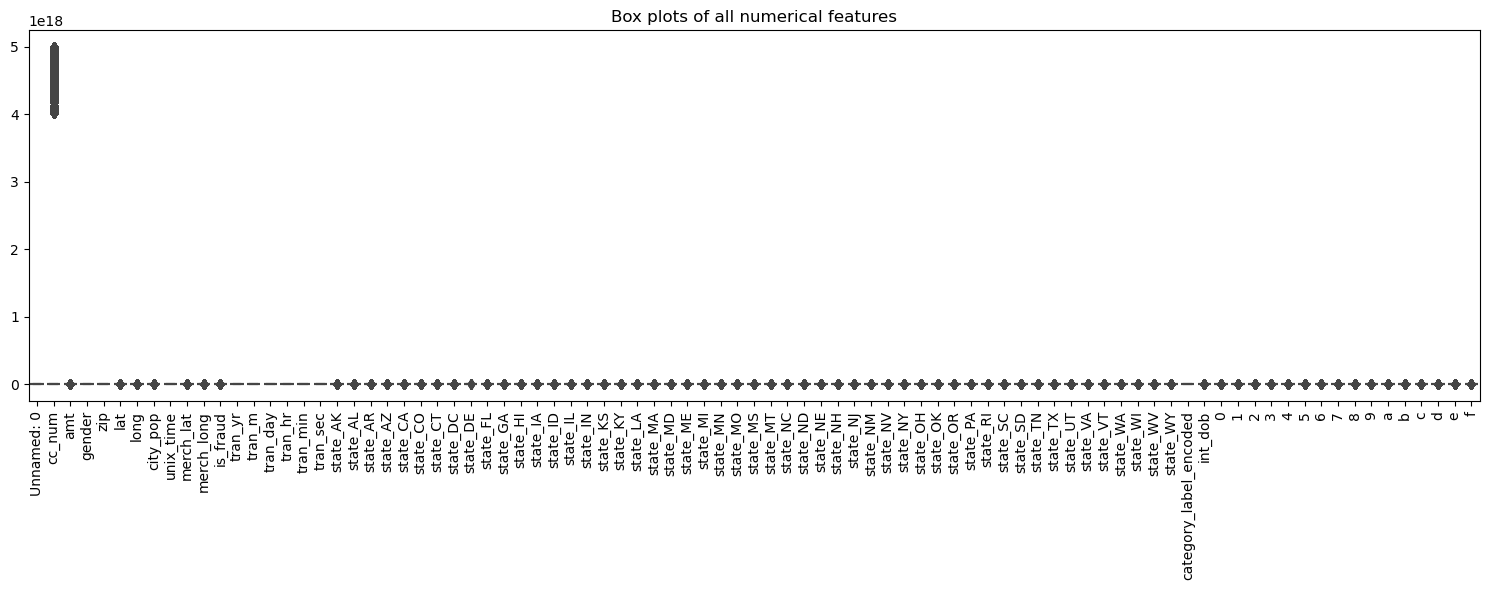

In [49]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  
plt.title('Box plots of all numerical features')
plt.tight_layout()
plt.show()

## Train Test Split and Standard Scaling

In [50]:
X=df.drop(labels=['is_fraud'],axis=1)
y=df['is_fraud']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [53]:
X_train_scaled=train_scaler.fit_transform(X_train)
X_test_Scaled=test_scaler.fit_transform(X_test)

In [54]:
scaled_train_df=pd.DataFrame(data=X_train_scaled, columns=X_train.columns, index=X_train.index)

In [69]:
scaled_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868772 entries, 741541 to 121958
Data columns (total 86 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              868772 non-null  float64
 1   cc_num                  868772 non-null  float64
 2   amt                     868772 non-null  float64
 3   gender                  868772 non-null  float64
 4   zip                     868772 non-null  float64
 5   lat                     868772 non-null  float64
 6   long                    868772 non-null  float64
 7   city_pop                868772 non-null  float64
 8   unix_time               868772 non-null  float64
 9   merch_lat               868772 non-null  float64
 10  merch_long              868772 non-null  float64
 11  tran_yr                 868772 non-null  float64
 12  tran_m                  868772 non-null  float64
 13  tran_day                868772 non-null  float64
 14  tran_hr             

In [55]:
scaled_test_df=pd.DataFrame(data=X_test_Scaled, columns=X_test.columns, index=X_test.index)

In [56]:
scaled_train_df.head()

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,...,6,7,8,9,a,b,c,d,e,f
741541,0.249498,-0.318930,0.231256,-1.101080,1.616665,-0.835471,-1.739926,-0.294523,0.275050,-0.923790,...,0.001515,-0.001597,-0.729192,-0.732722,-1.459997,0.001956,0.001353,-0.729647,1.460030,-0.000891
268287,-1.014566,-0.318768,-0.375347,-1.101080,0.140425,0.524470,-0.139050,-0.293062,-0.963209,0.631624,...,-1.459505,0.728452,-1.458764,1.458777,0.000370,-0.728310,-0.728685,-0.000237,-1.461066,0.728985
1175073,1.407465,-0.318793,-0.146398,0.908199,0.017055,0.755038,0.434321,-0.286595,1.441710,0.923438,...,0.732025,1.458501,0.000380,-0.002222,0.000370,0.001956,-1.458723,-0.729647,0.729756,-1.460642
1252348,1.613868,-0.316233,0.564842,0.908199,-1.320231,0.923186,1.094959,-0.289370,1.651663,0.934219,...,-1.459505,2.188550,0.729953,-0.002222,0.000370,-1.458575,0.001353,-1.459057,2.190304,1.458861
815516,0.447086,-0.316253,0.261735,-1.101080,0.405762,1.311380,-1.587316,-0.293994,0.443289,1.427203,...,-0.728995,2.188550,-0.729192,-0.732722,0.000370,0.732222,-1.458723,0.729173,-0.730792,1.458861


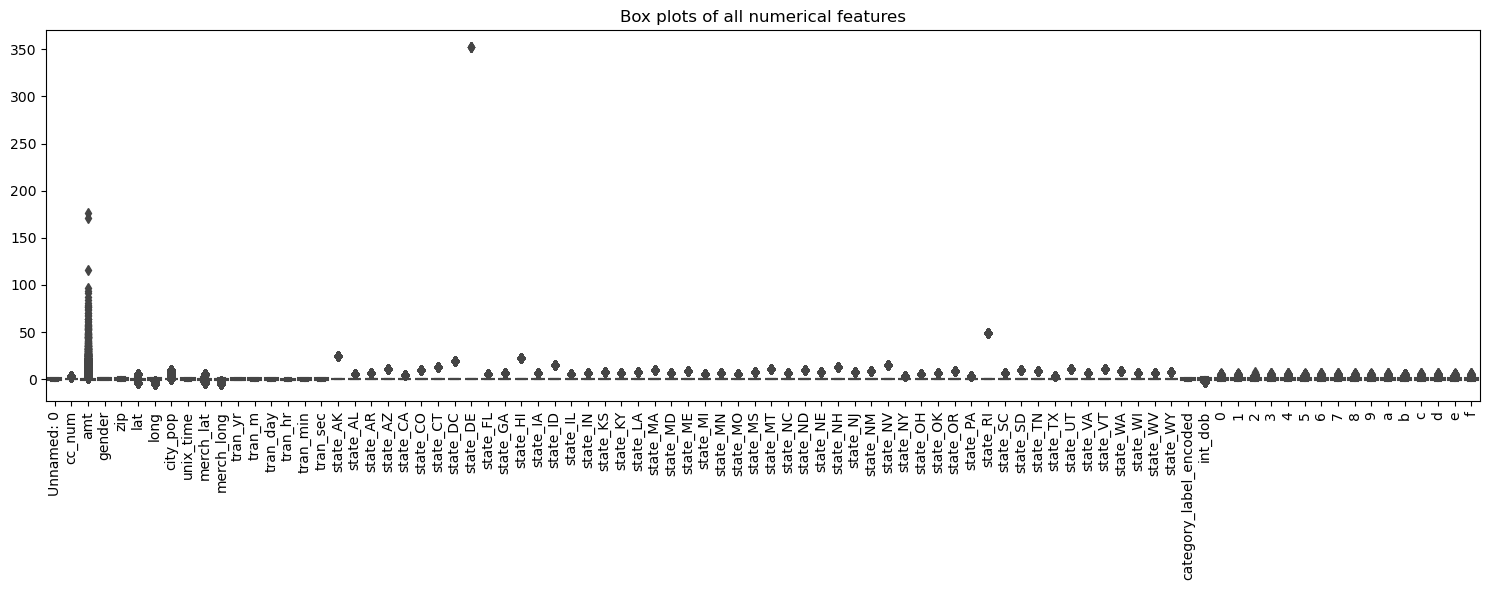

In [57]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=scaled_train_df)
plt.xticks(rotation=90)  
plt.title('Box plots of all numerical features')
plt.tight_layout()
plt.show()

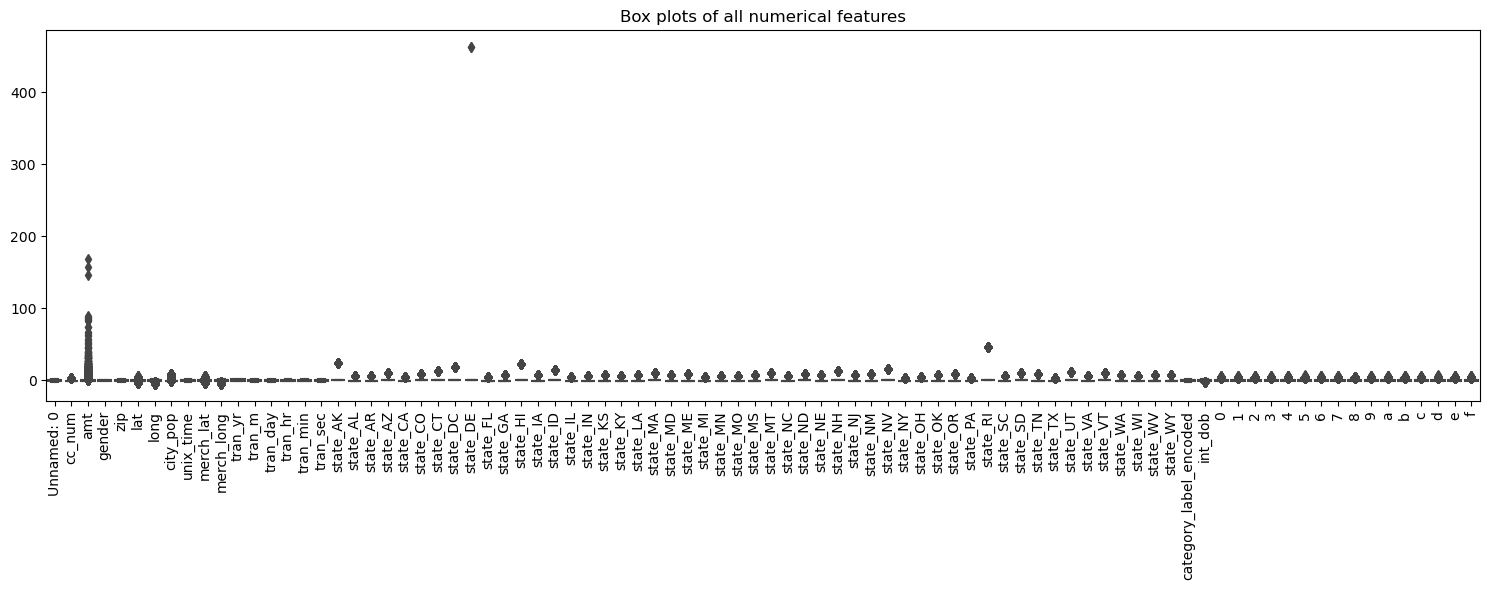

In [58]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=scaled_test_df)
plt.xticks(rotation=90)  
plt.title('Box plots of all numerical features')
plt.tight_layout()
plt.show()

## After Standard scaling , most of the outliers gets handeled

## Model Training and Evaluation

In [59]:
# Gaussian Naive Bayes
gnb_clf=GaussianNB()
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
grid = GridSearchCV(estimator=gnb_clf, param_grid=param_grid, cv=5,  verbose=3)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.981 total time=   1.2s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.979 total time=   1.1s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.974 total time=   1.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.984 total time=   1.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.983 total time=   1.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.966 total time=   1.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.960 total time=   1.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.954 total time=   1.1s
[CV 4/5] END .................var_smoothing=0.1;, score=0.967 total time=   1.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.952 total time=   1.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.966 total time=   1.0s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [60]:
grid.best_params_

{'var_smoothing': 1e-11}

In [61]:
gnb_clf_new=GaussianNB(var_smoothing= 1e-11)
gnb_clf_new.fit(X_train_scaled,y_train)
y_pred=gnb_clf_new.predict(X_test_Scaled)
print(accuracy_score(y_test,y_pred))

0.005819075818585053


In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    427890
           1       0.01      1.00      0.01        13

    accuracy                           0.99    427903
   macro avg       0.50      1.00      0.50    427903
weighted avg       1.00      0.99      1.00    427903



In [62]:
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_sr=GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,cv=3, scoring='accuracy',verbose=3)
grid_sr.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.994 total time= 2.4min
[CV 2/3] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.994 total time= 1.5min
[CV 3/3] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.994 total time= 1.5min


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=3)

In [72]:
best_params = grid_sr.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

best_rf_classifier.fit(X_train_scaled, y_train)

y_pred2 = best_rf_classifier.predict(X_test_Scaled)

accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy of the Random Forest model with best parameters: {accuracy:.2f}')

Accuracy of the Random Forest model with best parameters: 0.99


In [73]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    427890
           1       0.01      1.00      0.01        13

    accuracy                           0.99    427903
   macro avg       0.50      1.00      0.50    427903
weighted avg       1.00      0.99      1.00    427903



In [74]:
joblib.dump(best_rf_classifier, 'Random_forest_clf.pkl')

['Random_forest_clf.pkl']

In [76]:
# Xgboost
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                "max_depth": range(3, 11, 1),
                "random_state":[0,50,100]
    

}
grid2= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=3)
grid2.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END max_depth=3, n_estimators=50, random_state=0;, score=0.998 total time=   8.2s
[CV 2/3] END max_depth=3, n_estimators=50, random_state=0;, score=0.997 total time=   8.2s
[CV 3/3] END max_depth=3, n_estimators=50, random_state=0;, score=0.998 total time=   7.9s
[CV 1/3] END max_depth=3, n_estimators=50, random_state=50;, score=0.998 total time=   7.9s
[CV 2/3] END max_depth=3, n_estimators=50, random_state=50;, score=0.997 total time=   8.4s
[CV 3/3] END max_depth=3, n_estimators=50, random_state=50;, score=0.998 total time=   8.5s
[CV 1/3] END max_depth=3, n_estimators=50, random_state=100;, score=0.998 total time=   8.0s
[CV 2/3] END max_depth=3, n_estimators=50, random_state=100;, score=0.997 total time=   7.9s
[CV 3/3] END max_depth=3, n_estimators=50, random_state=100;, score=0.998 total time=   8.4s
[CV 1/3] END max_depth=3, n_estimators=100, random_state=0;, score=0.998 total time=  14.6s
[CV 2/3] END max_d

In [ ]:
grid2.best_params_

{'max_depth': 6, 'n_estimators': 130, 'random_state': 0}

In [ ]:
params = {'max_depth': 6,
          'n_estimators': 130,
          'random_state': 0}


In [ ]:
xgb_clf=XGBClassifier(**params)
xgb_clf.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=130, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred3=xgb_clf.predict(X_test_Scaled)
print(accuracy_score(y_test,y_pred3))

0.9964805107699642
